In [ ]:
pip install pyramid-arima

     |████████████████████████████████| 604kB 2.7MB/s 


In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from pyramid.arima import auto_arima


Insert Dataset NIFTY2010


In [ ]:
url = 'https://raw.githubusercontent.com/sj-leshrac/Stock_Market_Data/master/NIFTY2010.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

Date         Open         High  ...        Close  Volume    Change
0  03-05-2010  5278.399902  5278.700195  ...  5222.750000       0  0.000000
1  04-05-2010  5223.899902  5250.149902  ...  5148.500000       0 -1.421665
2  05-05-2010  5148.350098  5148.350098  ...  5124.899902       0 -0.458388
3  06-05-2010  5124.399902  5124.899902  ...  5090.850098       0 -0.664399
4  07-05-2010  5072.299805  5085.649902  ...  5018.049805       0 -1.430022

[5 rows x 7 columns]

Set Date as Index Column


In [ ]:
df['Date'] = pd.to_datetime(df.Date,format='%d-%m-%Y')
df.set_index("Date", inplace = True) 

In [ ]:
df.head()

Open         High  ...  Volume    Change
Date                                  ...                  
2010-05-03  5278.399902  5278.700195  ...       0  0.000000
2010-05-04  5223.899902  5250.149902  ...       0 -1.421665
2010-05-05  5148.350098  5148.350098  ...       0 -0.458388
2010-05-06  5124.399902  5124.899902  ...       0 -0.664399
2010-05-07  5072.299805  5085.649902  ...       0 -1.430022

[5 rows x 6 columns]

In [ ]:
from google.colab import files
df.to_csv('yolo.csv') 


MessageError: ignored

Visualization

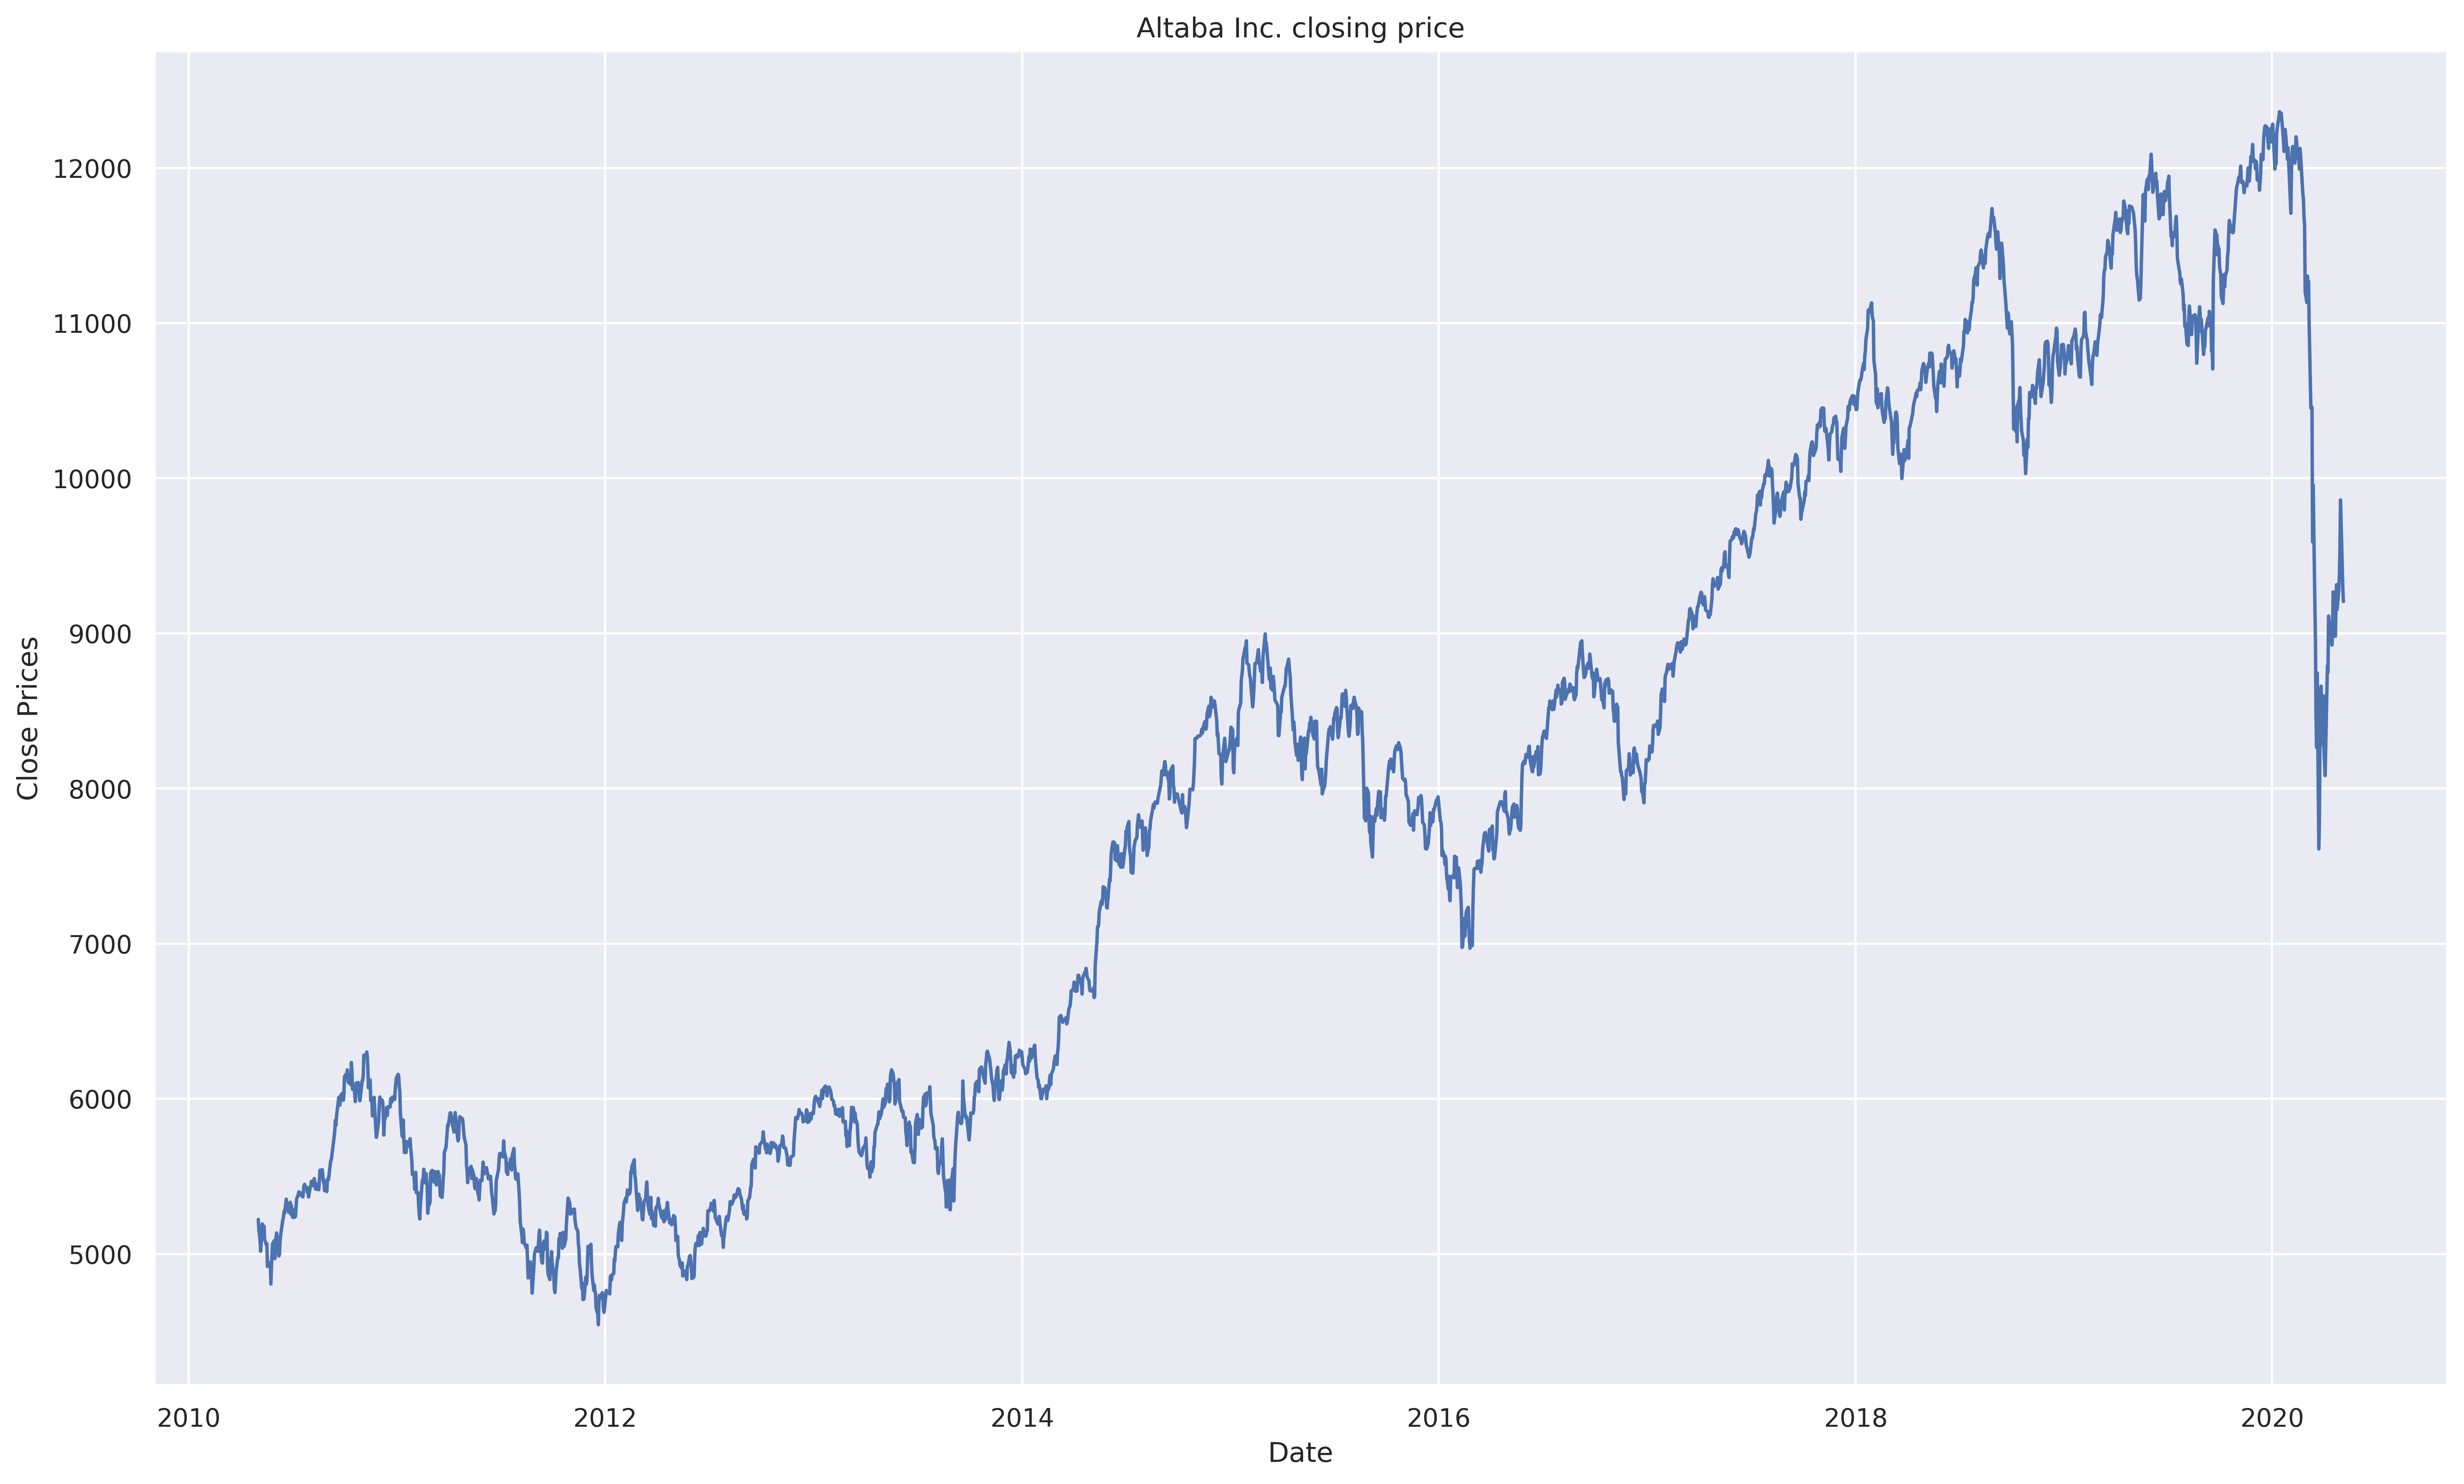

In [ ]:
#plot close price
plt.figure(figsize=(16,10))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(df['Close'])
plt.title('Altaba Inc. closing price')
plt.show()

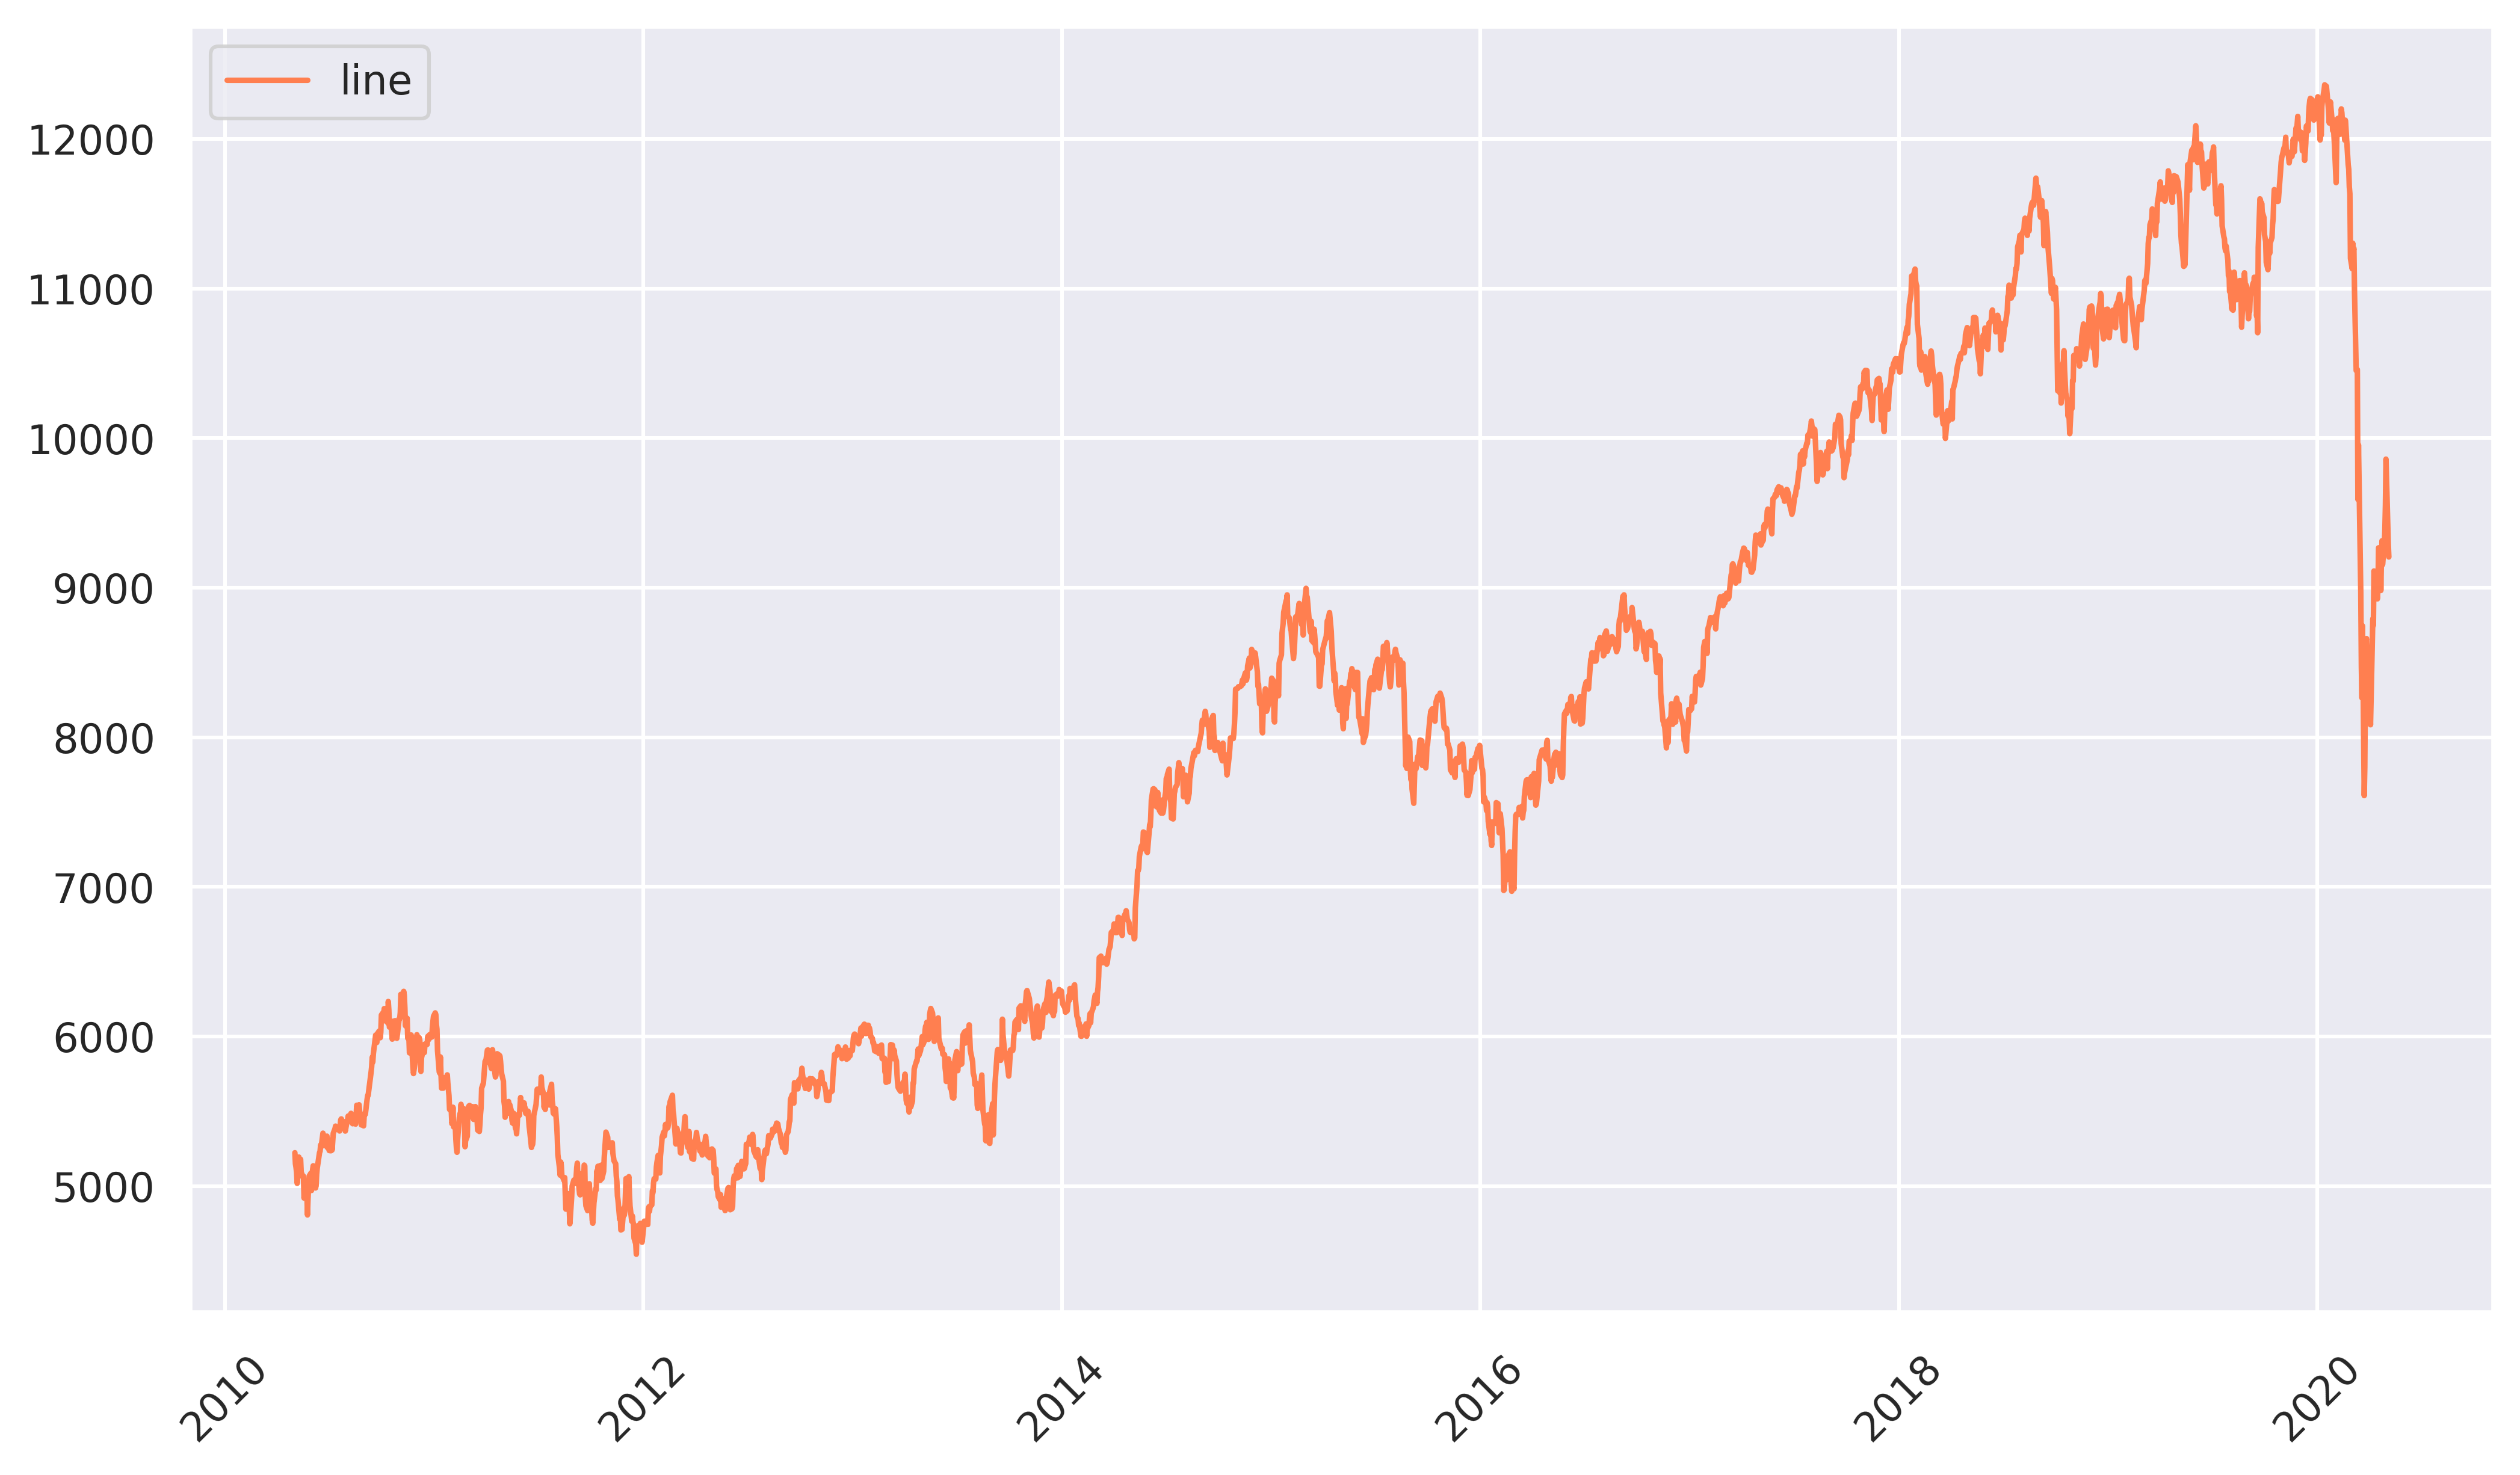

In [ ]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 10,6
plt.xticks(rotation=45)
ax = sns.lineplot(data=df["Close"], color="coral", label="line")

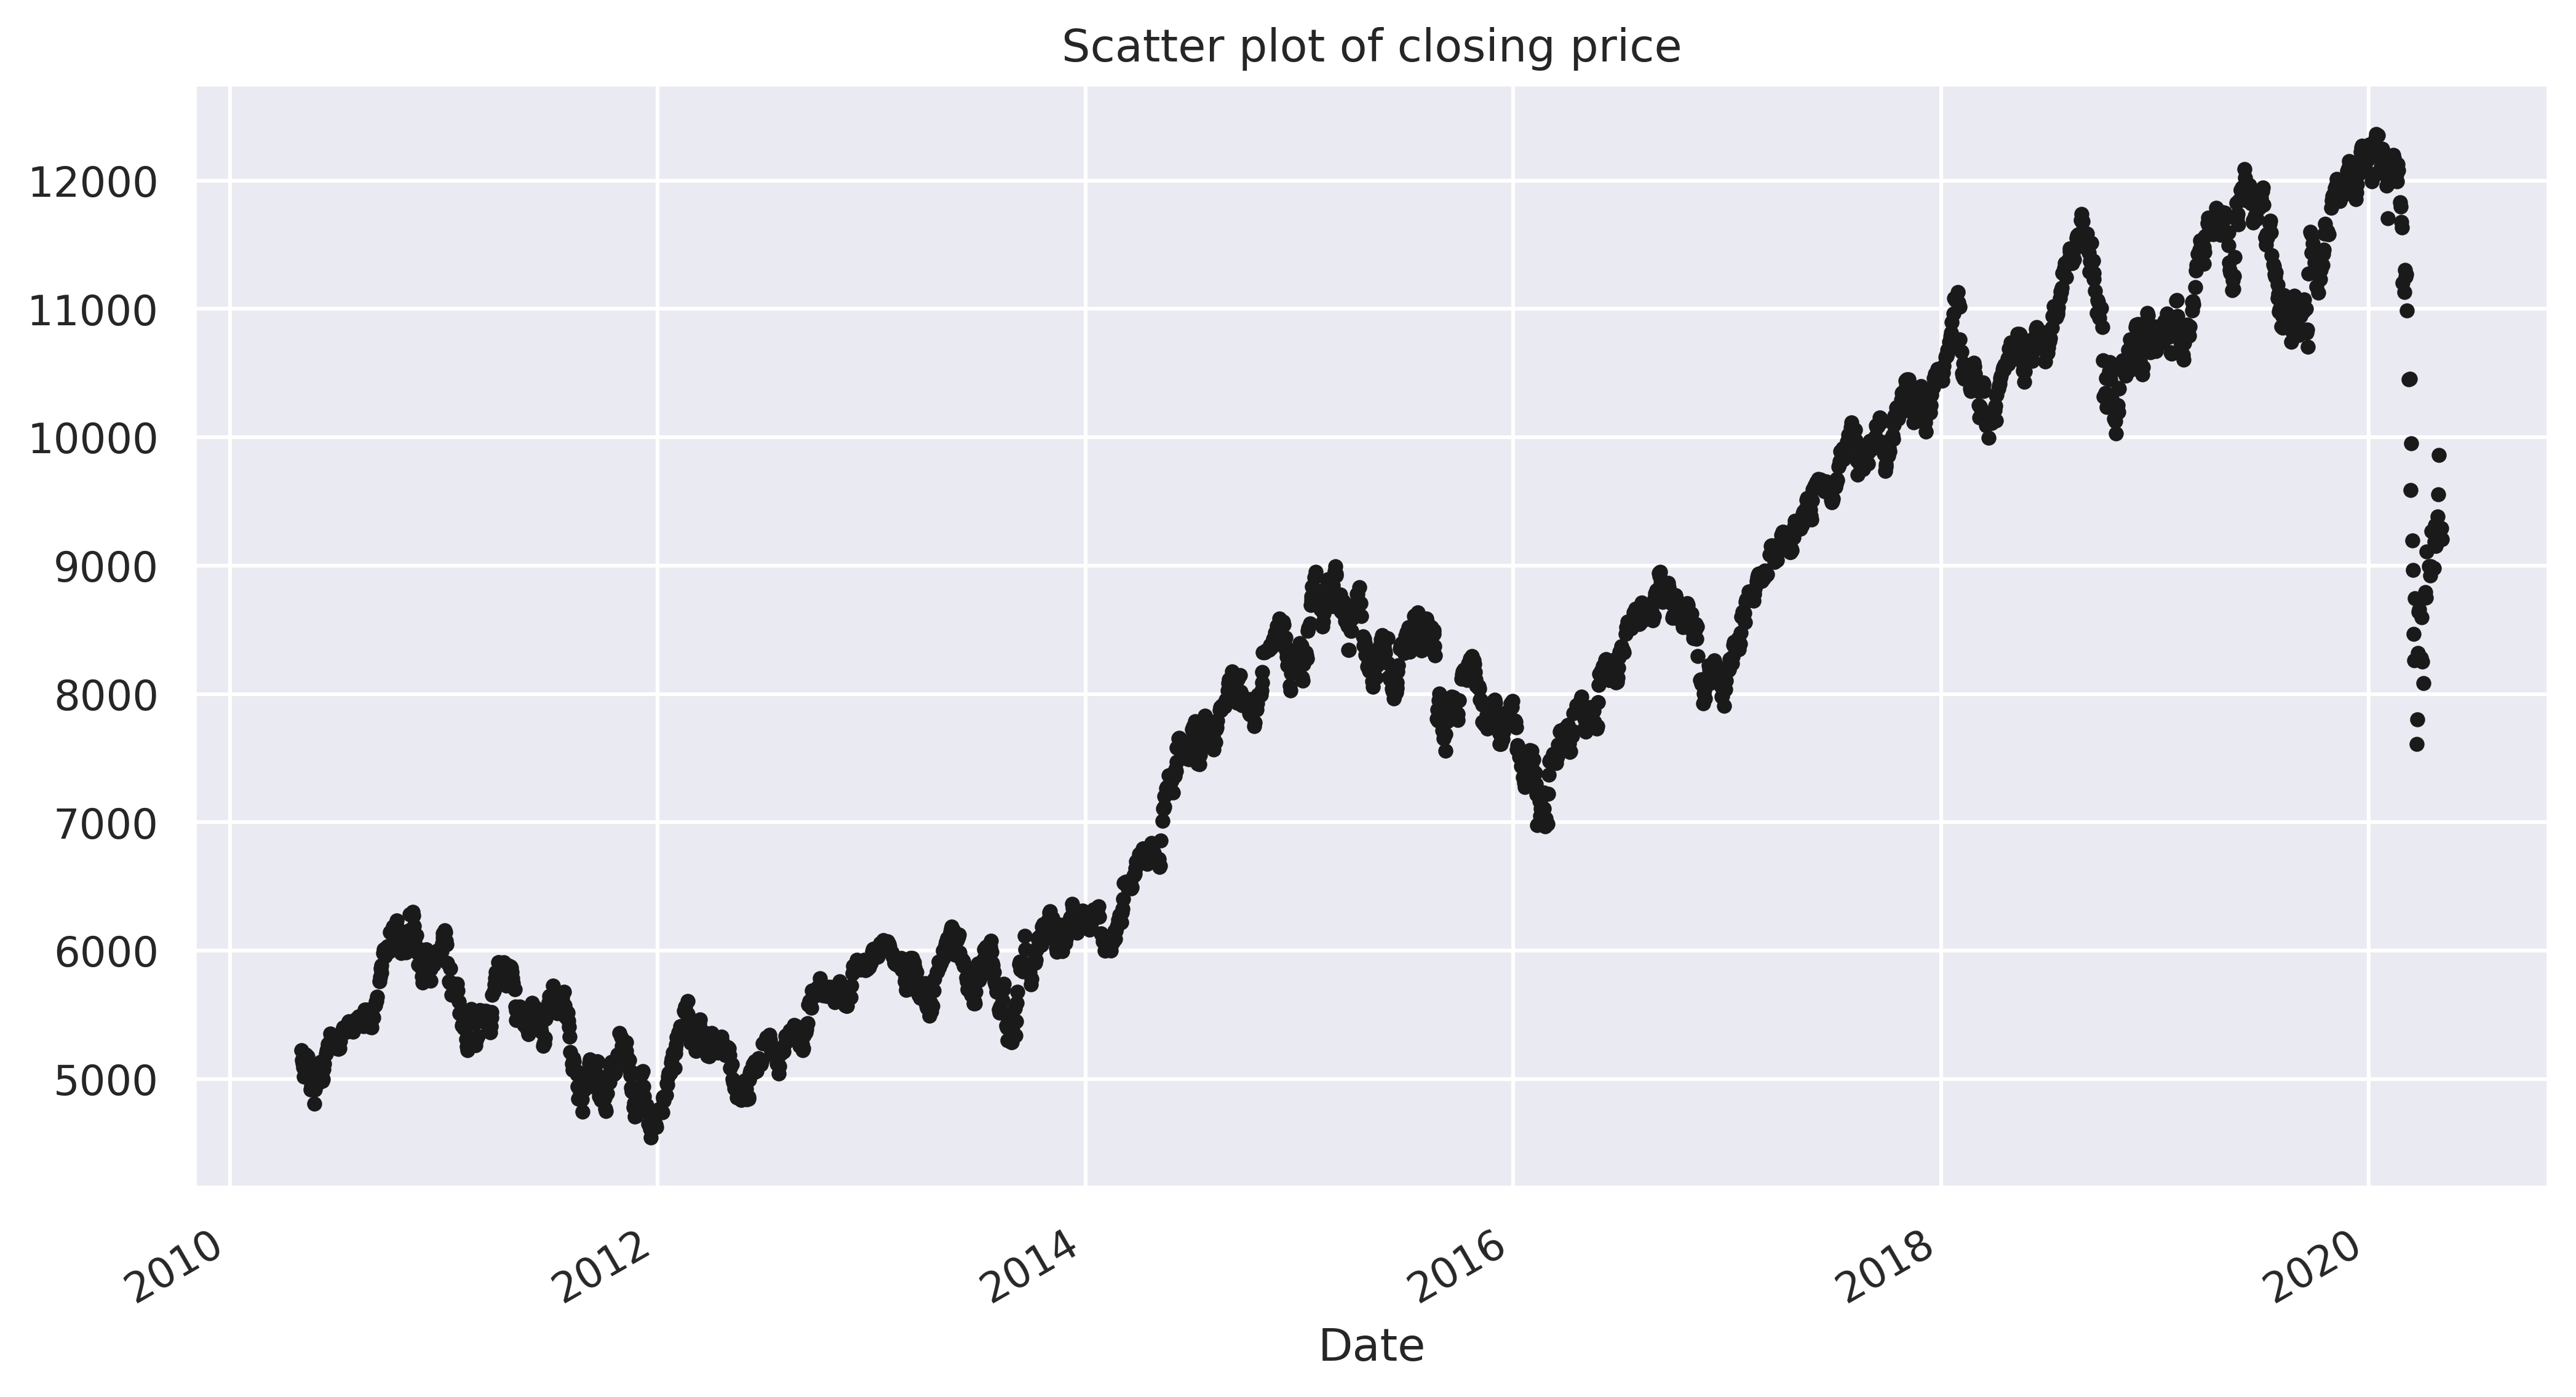

In [ ]:
df_close = df['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

Test for Stationarity

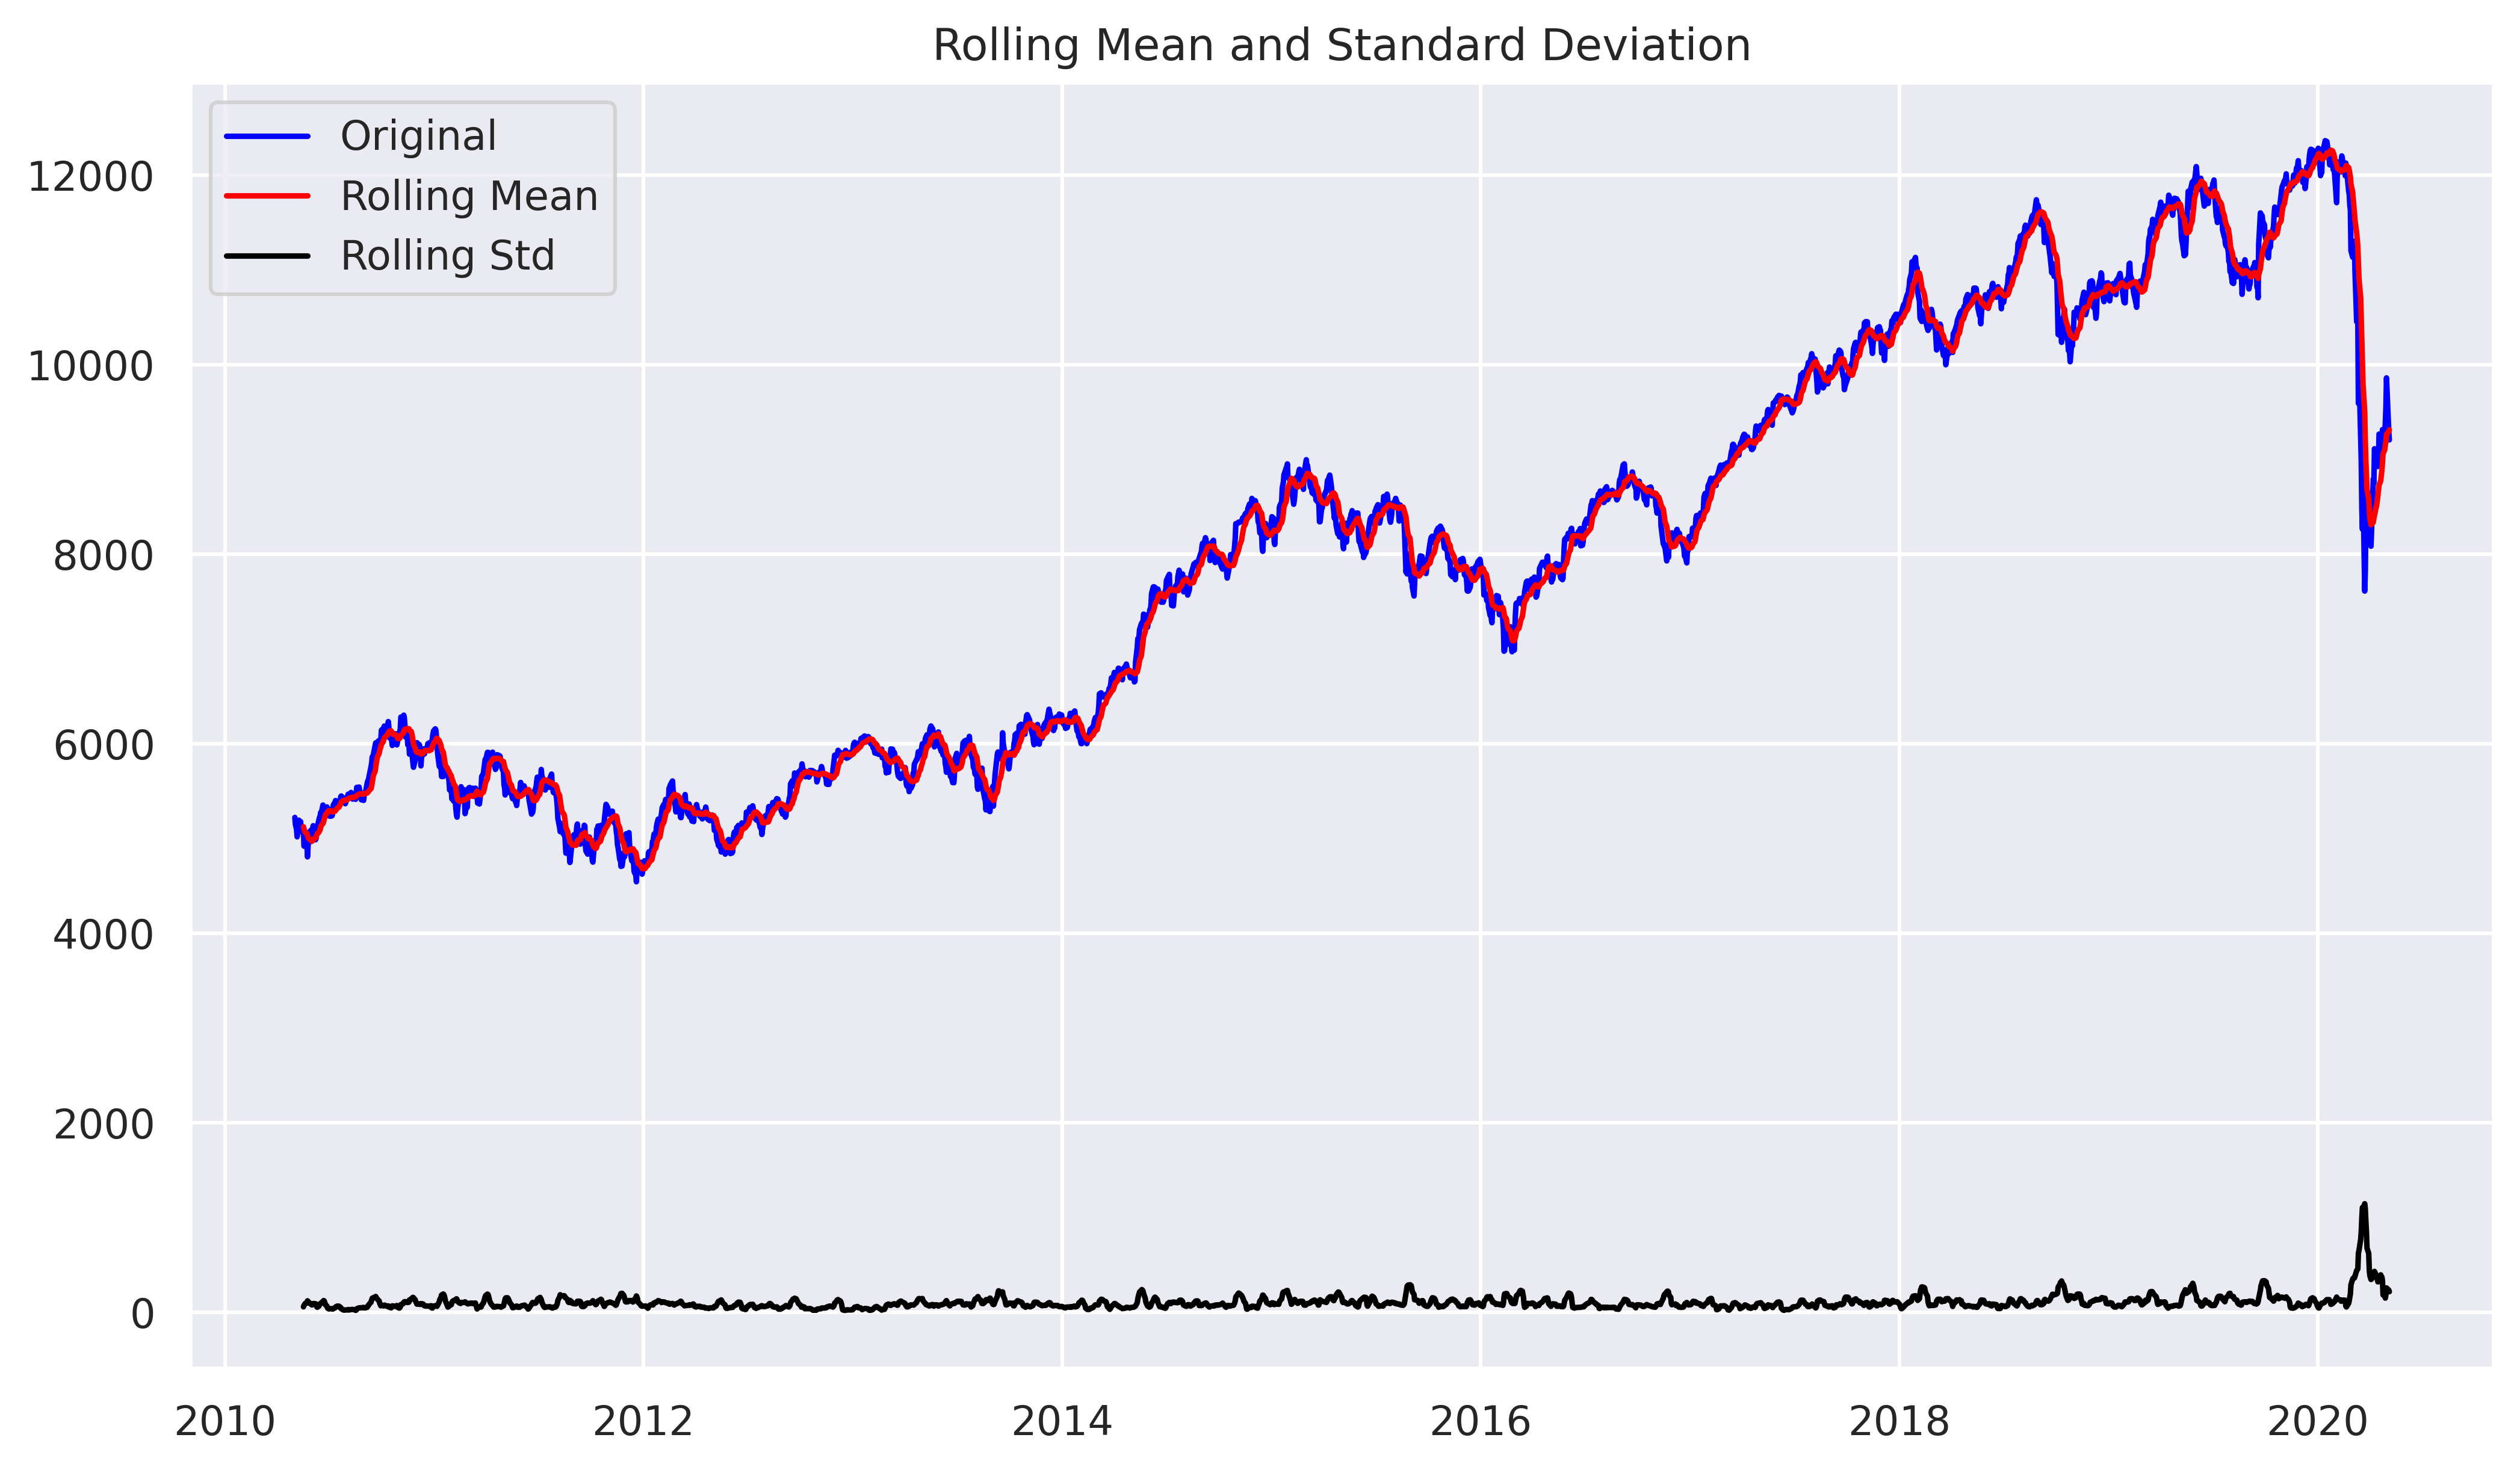

Results of dickey fuller test
Test Statistics                  -1.446753
p-value                           0.559669
No. of lags used                 14.000000
Number of observations used    2434.000000
critical value (1%)              -3.433039
critical value (5%)              -2.862728
critical value (10%)             -2.567403
dtype: float64


In [ ]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df['Close'])

Seperate Trend and seasonality

<Figure size 4400x2640 with 0 Axes>

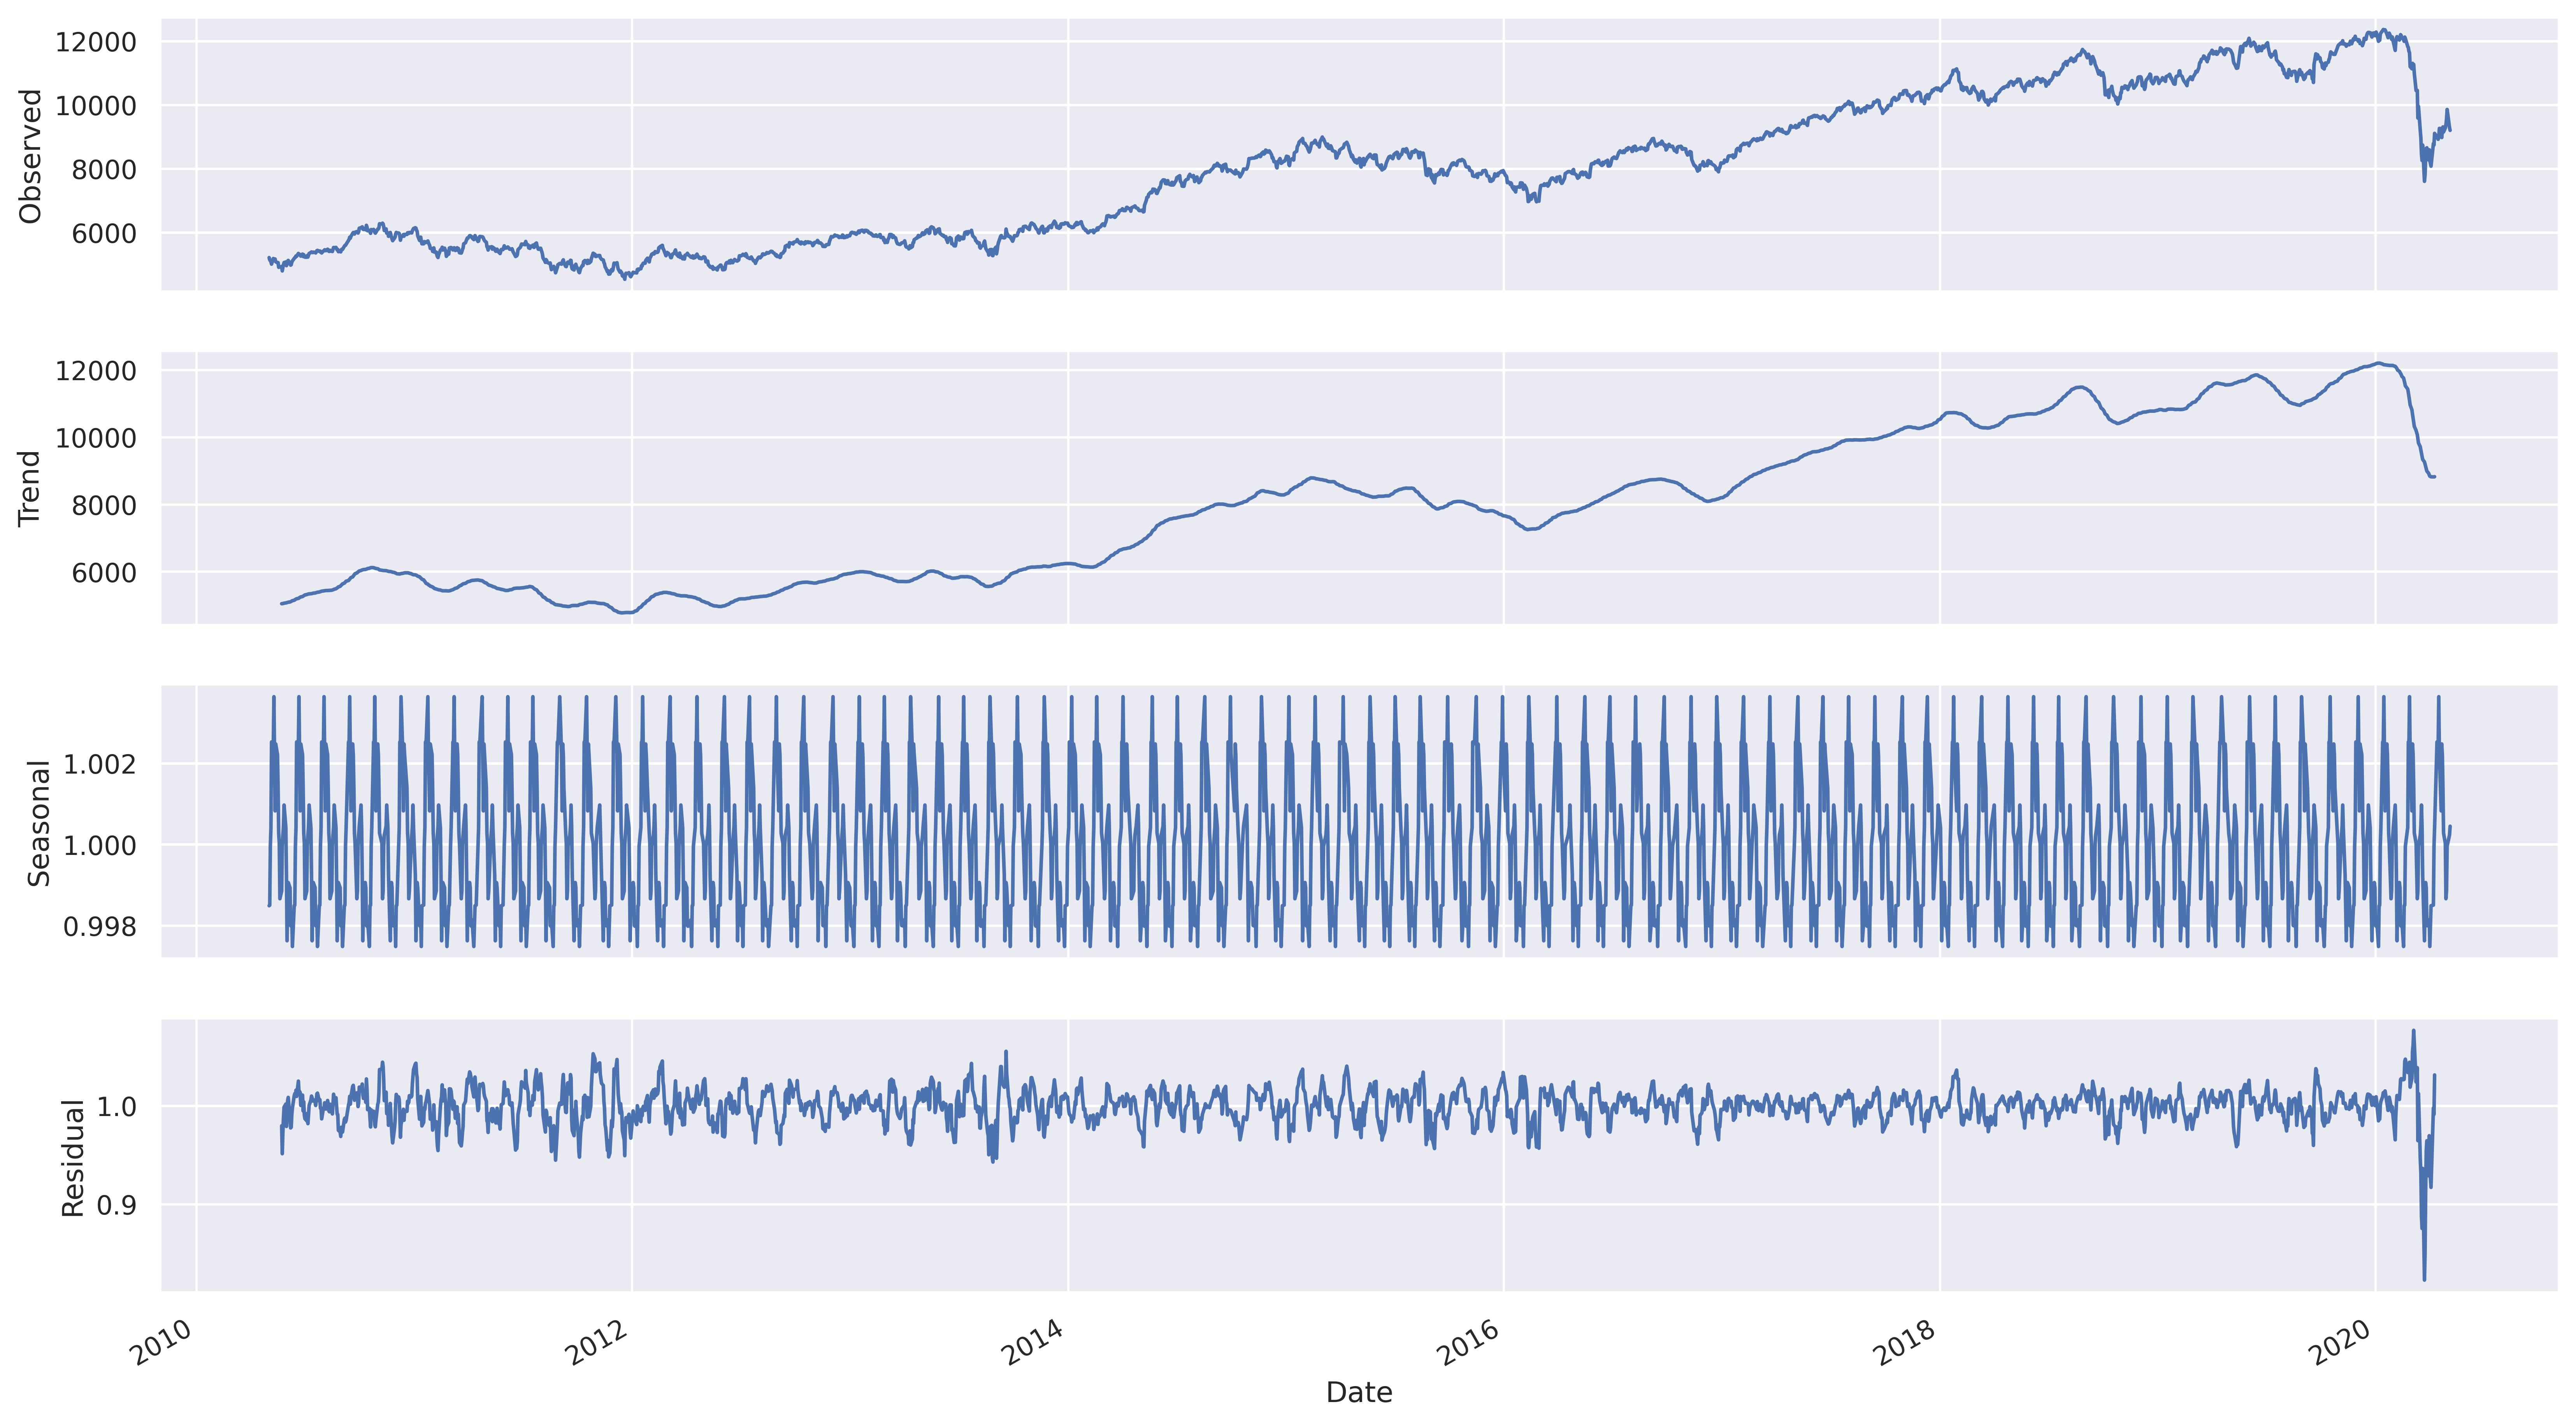

In [ ]:
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

Moving Average

No handles with labels found to put in legend.


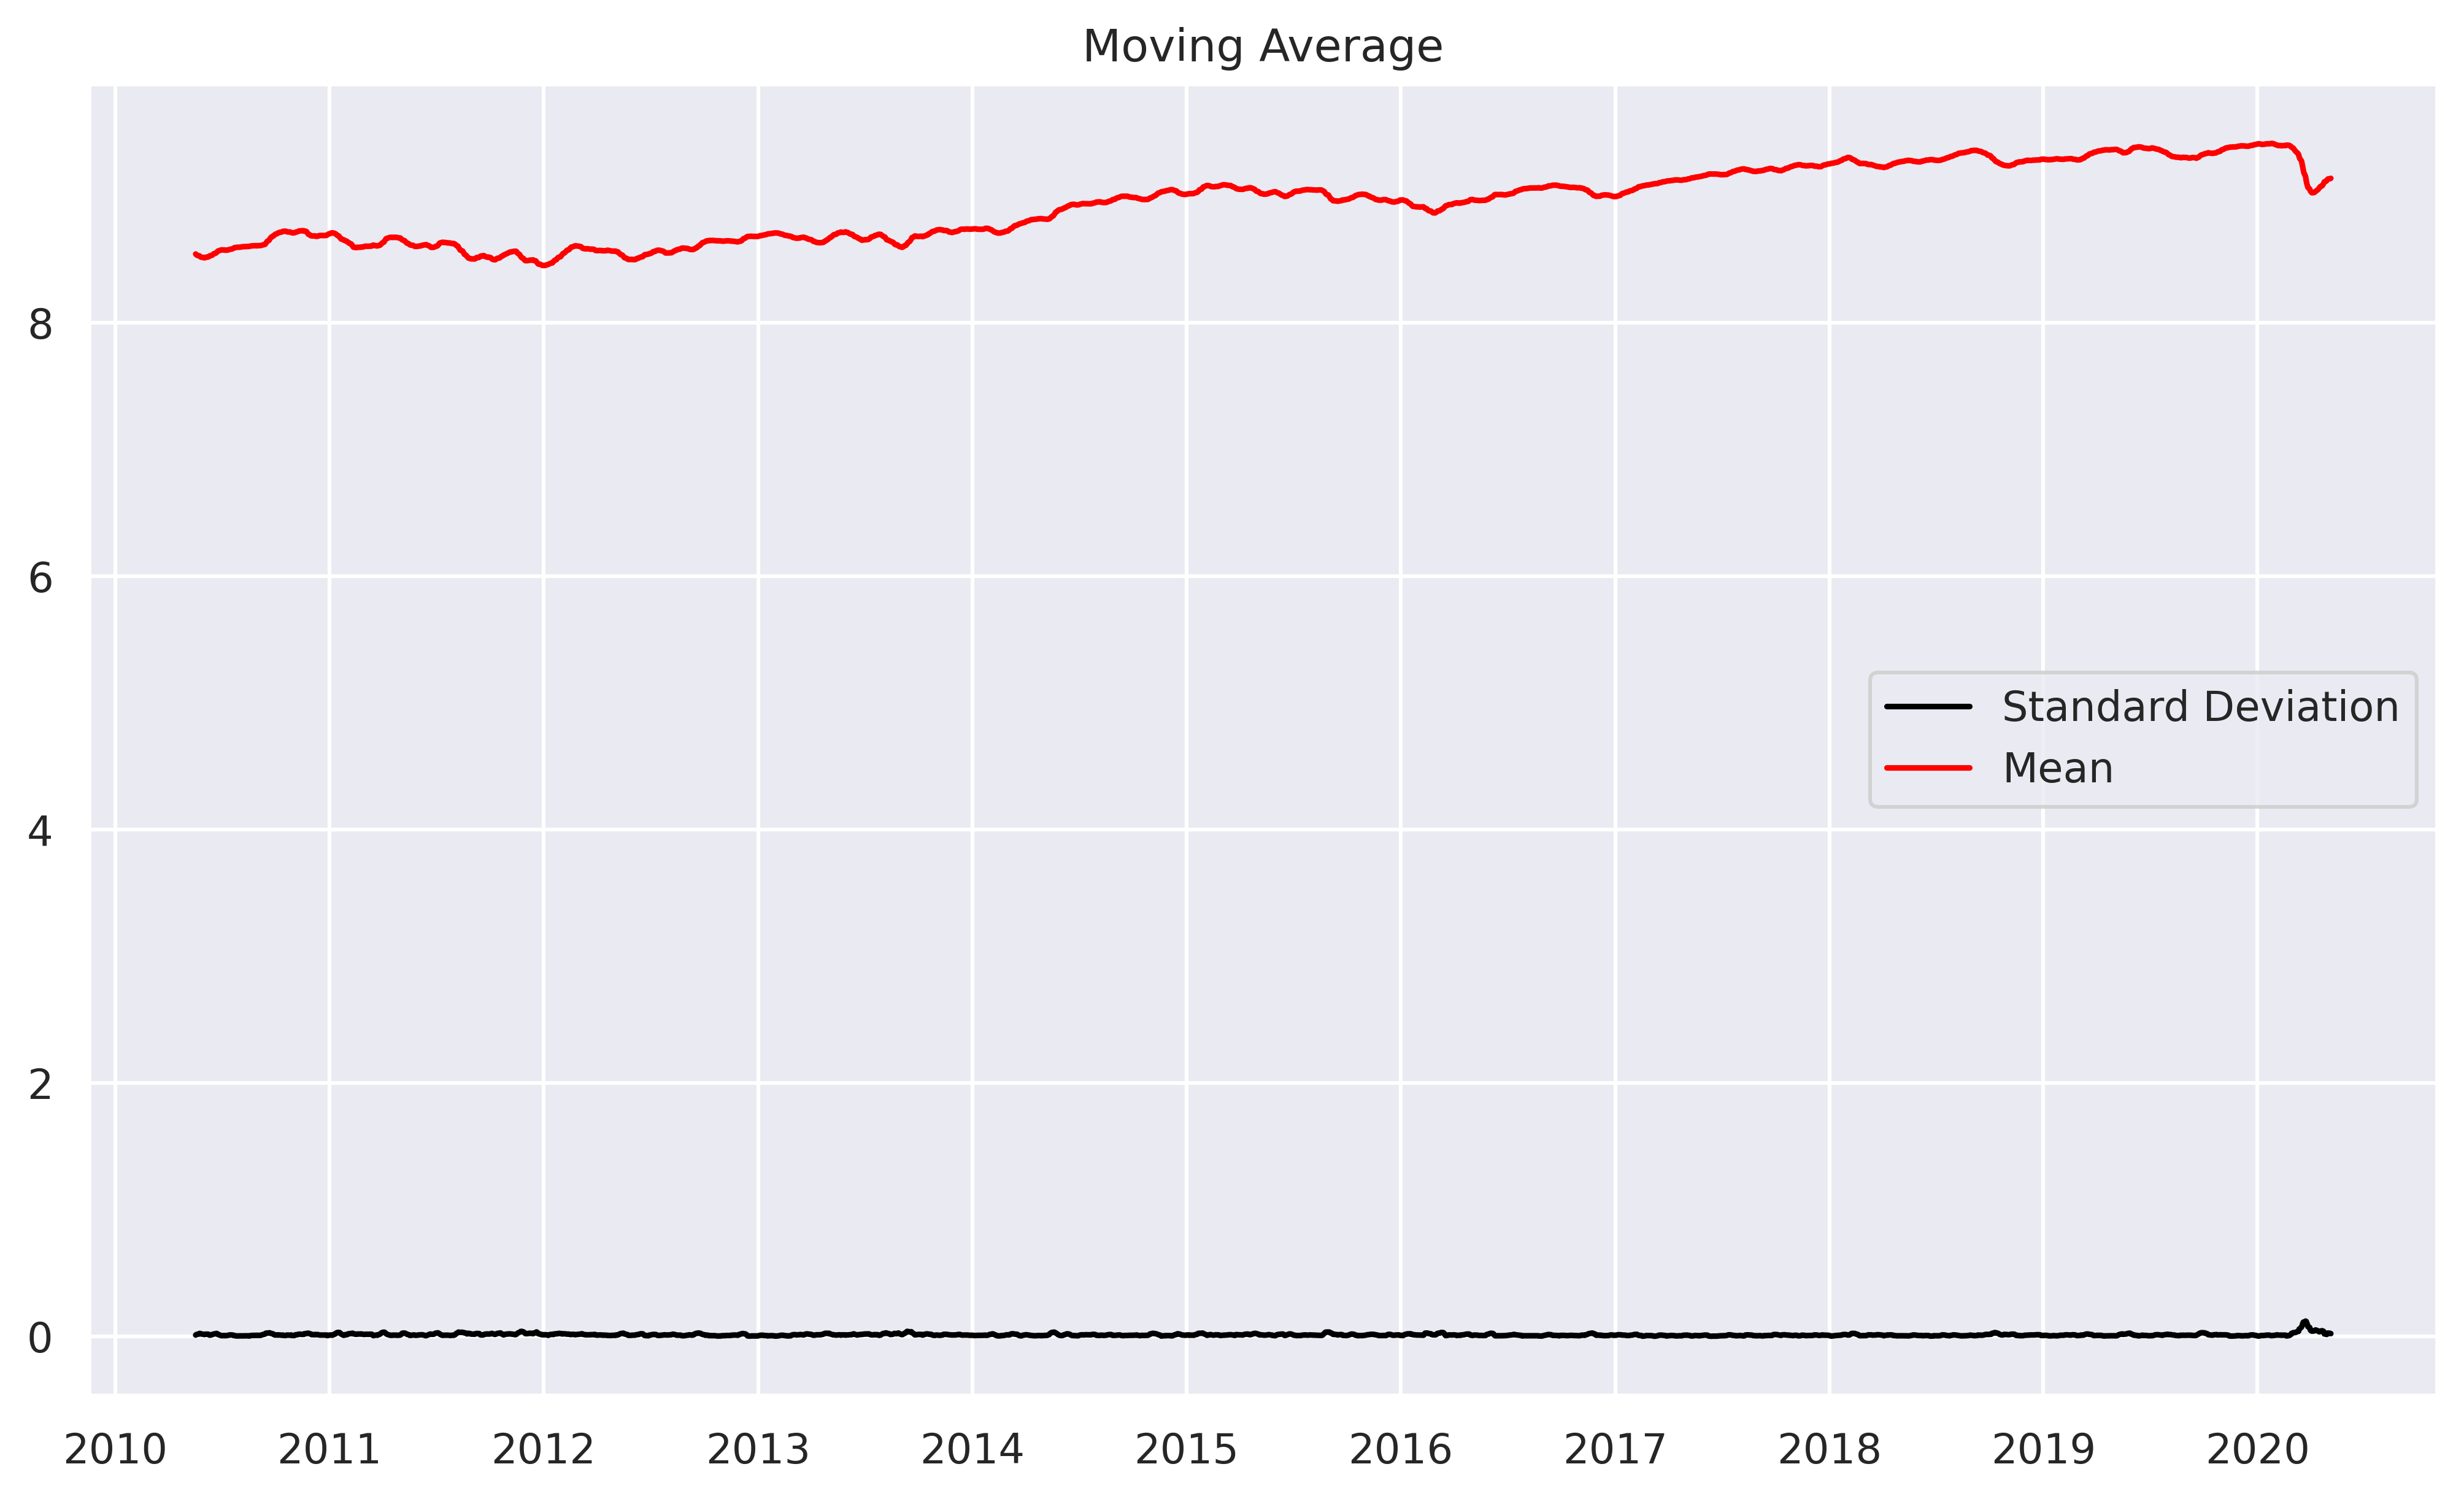

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

Train Test Split

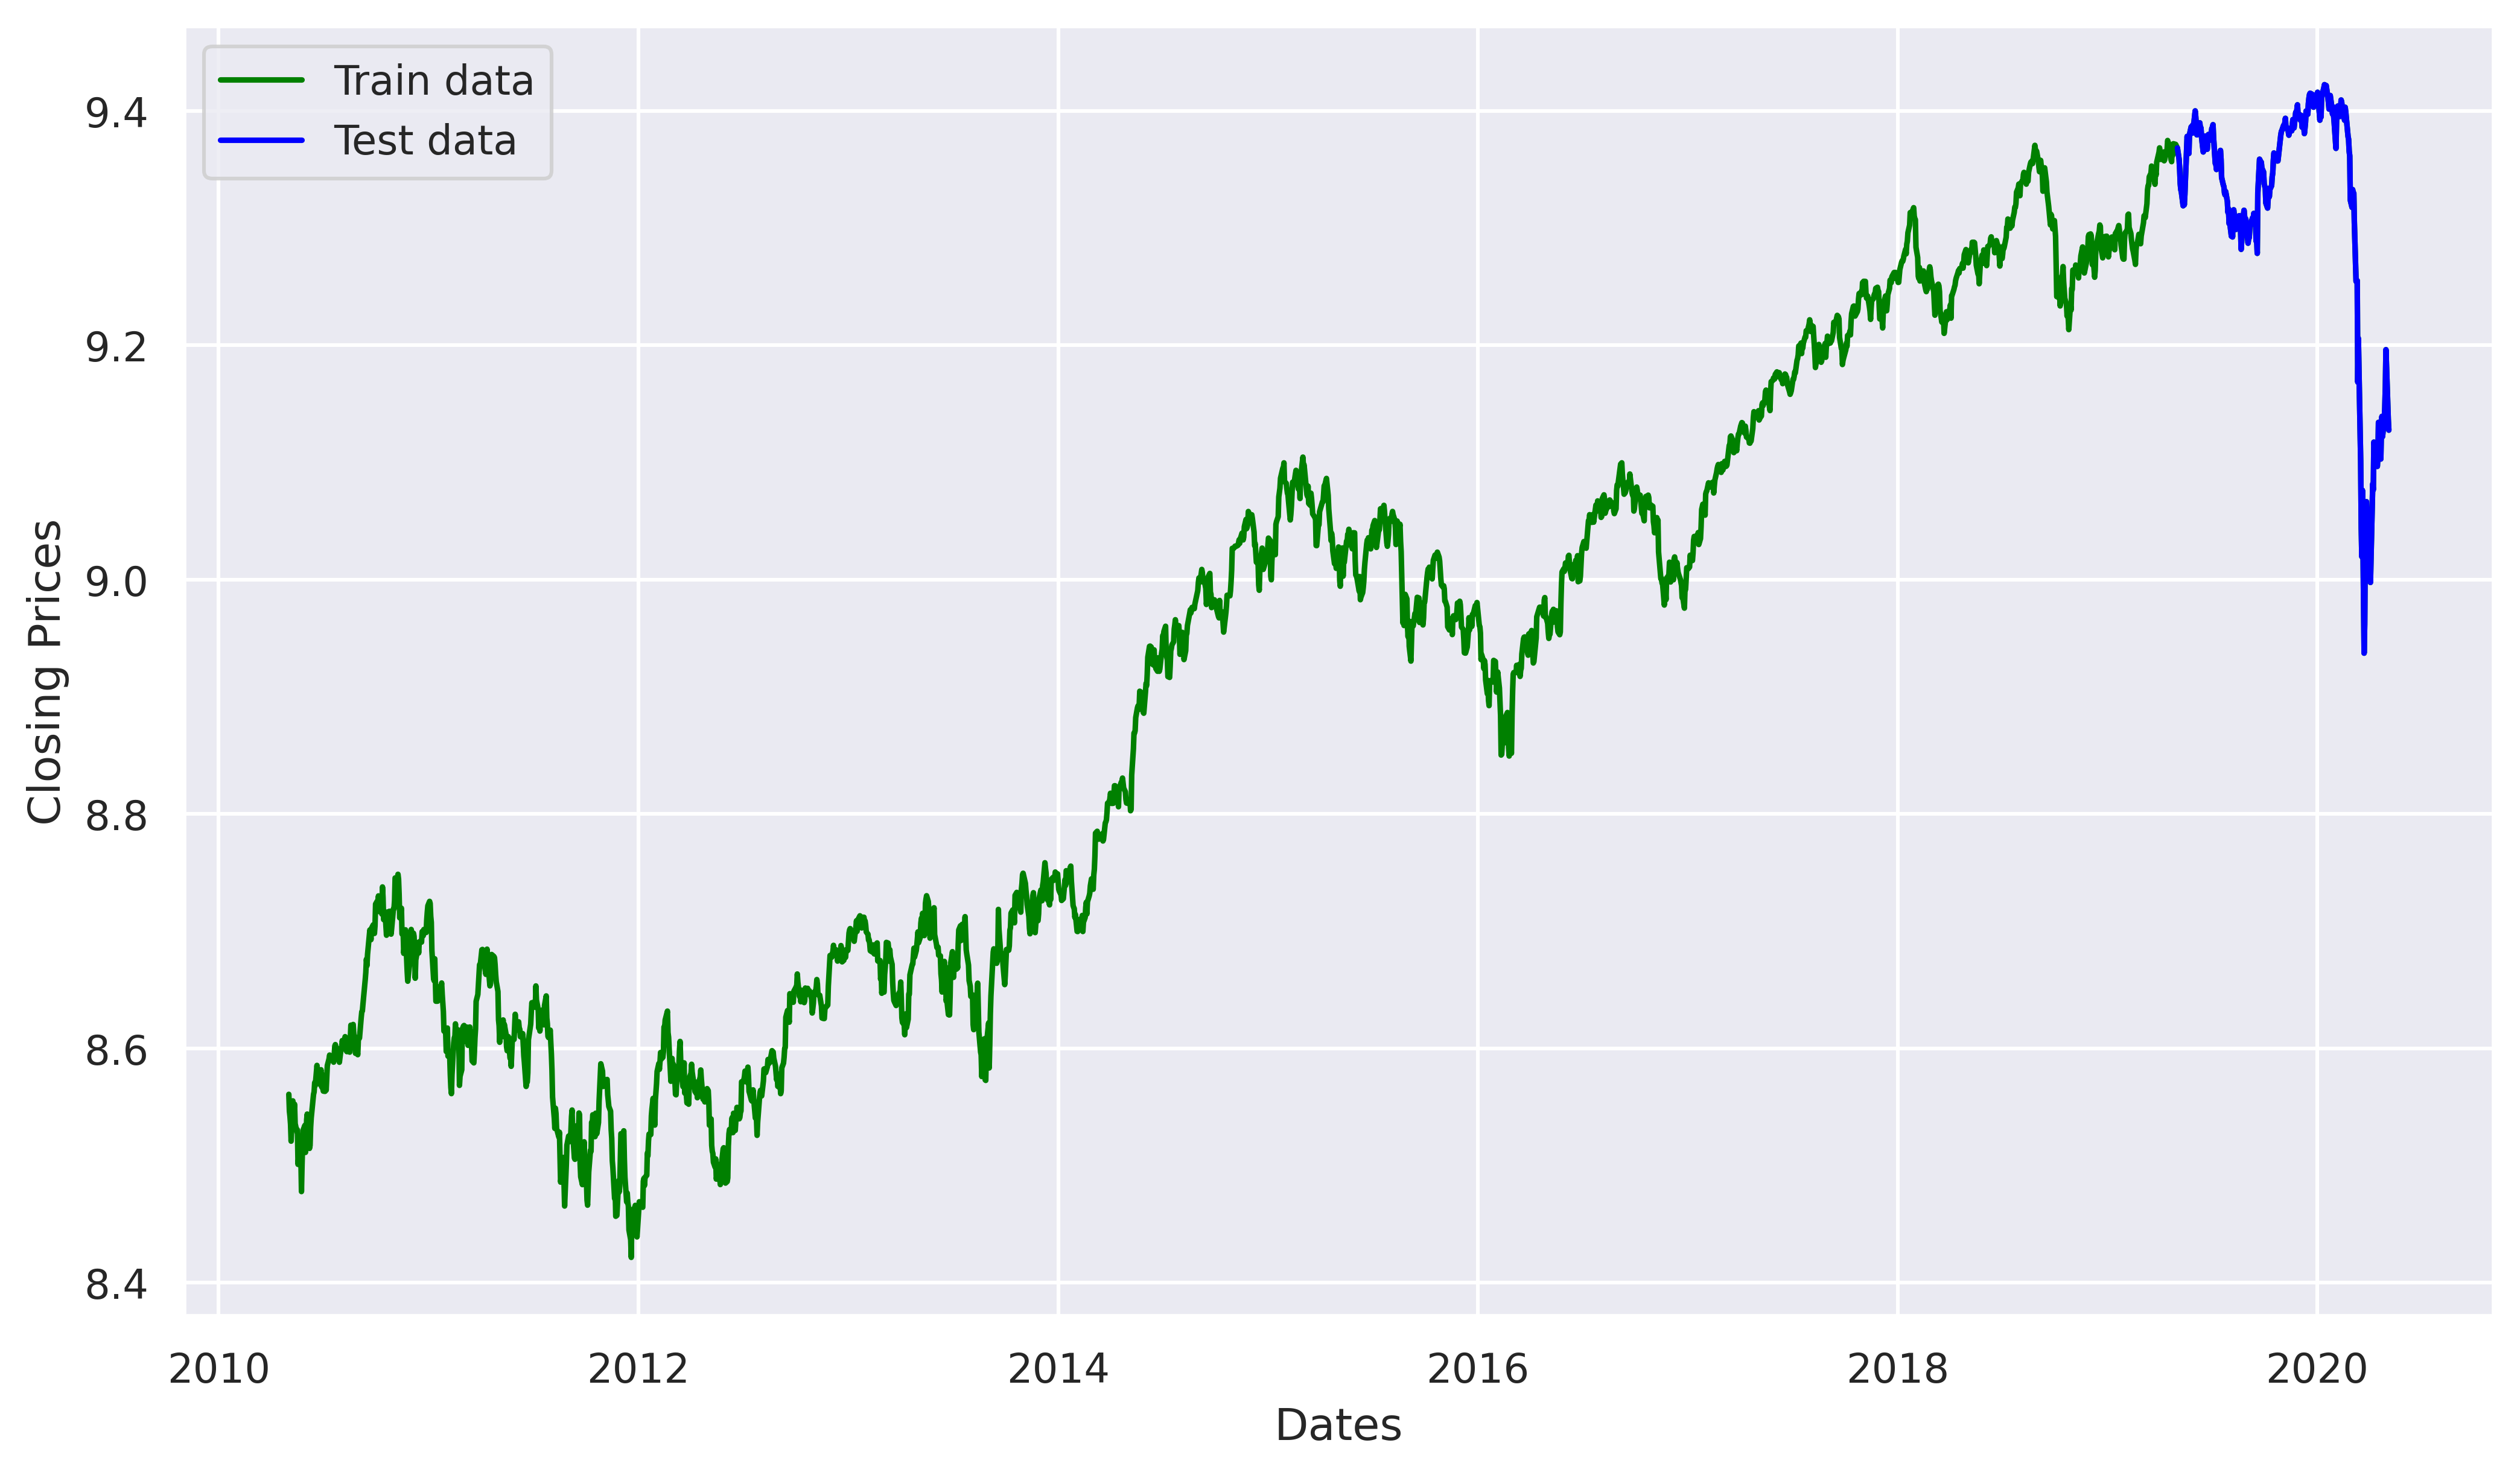

In [ ]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Auto ARIMA

In [ ]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Fit ARIMA: order=(0, 0, 0); AIC=400.293, BIC=411.686, Fit time=0.017 seconds
Fit ARIMA: order=(1, 0, 0); AIC=-14116.138, BIC=-14099.048, Fit time=0.104 seconds
Fit ARIMA: order=(0, 0, 1); AIC=-2538.430, BIC=-2521.340, Fit time=0.152 seconds
Fit ARIMA: order=(2, 0, 0); AIC=-14124.489, BIC=-14101.702, Fit time=0.073 seconds
Fit ARIMA: order=(2, 0, 1); AIC=-14122.623, BIC=-14094.140, Fit time=0.507 seconds
Fit ARIMA: order=(3, 0, 1); AIC=-14122.568, BIC=-14088.388, Fit time=0.887 seconds
Fit ARIMA: order=(3, 0, 0); AIC=-14122.714, BIC=-14094.231, Fit time=0.162 seconds
Total fit time: 1.913 seconds
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 2201
Model:                     ARMA(2, 0)   Log Likelihood                7066.244
Method:                       css-mle   S.D. of innovations              0.010
Date:                Sat, 09 May 2020   AIC                         -14124.489
Ti

In [ ]:
model = ARIMA(train_data, order=(2, 0, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 2201
Model:                     ARMA(2, 0)   Log Likelihood                7066.244
Method:                       css-mle   S.D. of innovations              0.010
Date:                Sat, 09 May 2020   AIC                         -14124.489
Time:                        16:41:36   BIC                         -14101.702
Sample:                             0   HQIC                        -14116.163
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.9344      0.288     31.017      0.000       8.370       9.499
ar.L1.Close     1.0681      0.017     64.305      0.000       1.036       1.101
ar.L2.Close    -0.0685      0.017     -4.125    

Residual Plots of ARIMA

In [ ]:
from statsmodels.tsa.arima_model import ARIMA


In [ ]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

AttributeError: ignored

Predictions

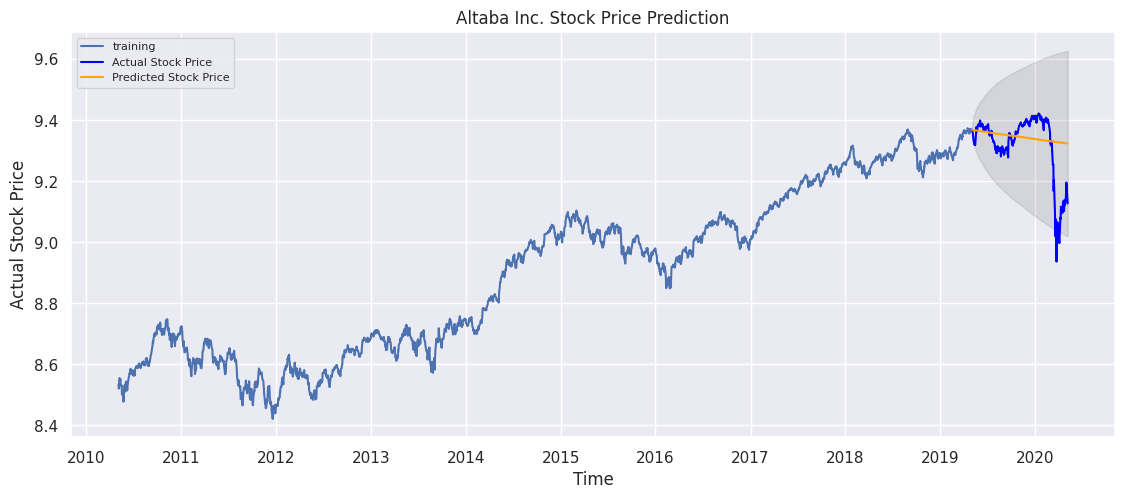

In [ ]:
# Forecast
fc, se, conf = fitted.forecast(245, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Altaba Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.010024651214779298
MAE: 0.06648284972497279
RMSE: 0.1001231802070794
MAPE: 0.007208951157925649
